In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

#### Prepering the data

In [10]:
breastCancer = load_breast_cancer()
X = breastCancer["data"]
X.shape

(569, 30)

#### Step 1 Normalizing the data 

In [18]:
_X = X - X.mean(axis=0)
print(_X.mean(axis=0))

[-2.18532476e-17  1.03802926e-15  5.45706811e-15  1.67832941e-14
 -4.13406860e-18  1.29265862e-18 -1.51216669e-18  2.43897853e-19
 -9.66445241e-18  6.09744631e-21  2.12191132e-18 -1.67313927e-17
  1.36582797e-17 -5.61940652e-16 -6.02599186e-20 -4.26821242e-20
 -4.26821242e-19  6.09744631e-21 -2.31702960e-19 -1.60057966e-20
  5.91598631e-16 -1.55938531e-15  2.12288691e-15  1.59840897e-14
 -8.04862913e-19  1.00973711e-17 -2.53653767e-18  1.46338712e-18
  3.44437120e-17  2.31702960e-19]


#### Step 2 Coveriance Matrix

In [19]:
S = np.dot(_X.T, _X);
S.shape

(30, 30)

#### Step 3 Eigenvalues decomposition 

In [33]:
eigenvalues, eigenvectors =  np.linalg.eig(S)
print(eigenvalues[:5])
eigenvectors[:,0].shape #for ith value of 


[2.52068520e+08 4.15213684e+06 3.99777565e+05 3.10404831e+04
 2.26575301e+04]


(30,)

#### Step 4 Vectors

In [63]:
V = eigenvectors[:,:3] #taking the first 3 vectors out of 30
V.shape

(30, 3)

#### Projection

In [64]:
projected_X = np.dot(_X,V)
print(X.shape)
projected_X.shape # Reduced from 30 dimentions to 3 dimention

(569, 30)


(569, 3)

In [75]:
total = sum(eigenvalues)
explained_variance = np.round(eigenvalues/total, 9)
cummulative_variance = np.cumsum(explained_variance)

In [77]:
import matplotlib.pyplot as plt

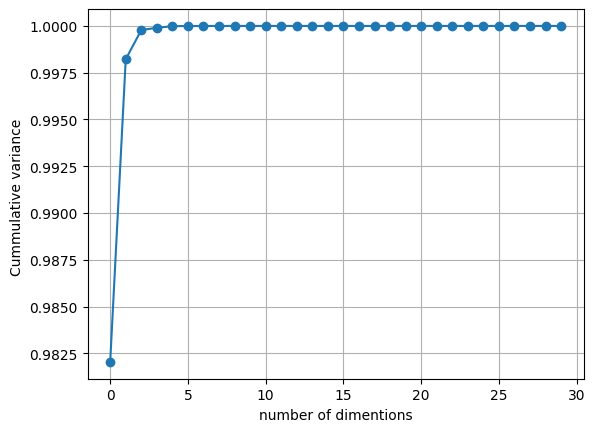

In [88]:
plt.plot(cummulative_variance, marker = "o")
plt.grid(True)
plt.xlabel("number of dimentions")
plt.ylabel("Cummulative variance ")
plt.show()

#### Sklearn implementation

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

print(projected_X)
pca.fit_transform(X)
np.sum(pca.explained_variance_ratio_)

[[1160.1425737  -293.91754364   48.57839763]
 [1269.12244319   15.63018184  -35.39453423]
 [ 995.79388896   39.15674324   -1.70975298]
 ...
 [ 314.50175618   47.55352518  -10.44240718]
 [1124.85811531   34.12922497  -19.74208742]
 [-771.52762188  -88.64310636   23.88903189]]


0.9997786721191874